In [ ]:
!nvidia-smi

In [ ]:
!pip install git+https://github.com/Mayukhdeb/torch-dreams.git

In [10]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from torchvision import models
import numpy as np
from torch_dreams.auto.dreamer import dreamer

In [ ]:
segmentation_model = models.segmentation.fcn_resnet50(pretrained=True).eval()
dreamy_boi = dreamer(segmentation_model, quiet = False, device = 'cuda')
layers_to_use = [
    segmentation_model.aux_classifier[-1]
]

In [ ]:
def make_custom_func(layer_number , channel_number): 
    def custom_func(layer_outputs):
        loss = layer_outputs[layer_number][channel_number].mean()
        return -loss
    return custom_func

In [11]:
classes = ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [ ]:
all_outs = []
for i in range(21):
    my_func = make_custom_func(layer_number=0, channel_number= i)
    # my_func = make_custom_func(0, i)
    image_param = dreamy_boi.render(
        width = 256,
        height = 256,
        iters = 300,
        layers = layers_to_use,
        custom_func= my_func,
        lr = 8e-3,
        rotate_degrees = 45,
        scale_max= 1.2,
        scale_min= 0.2
    )
    plt.imshow(image_param.rgb)
    plt.show()
    all_outs.append(image_param.rgb)

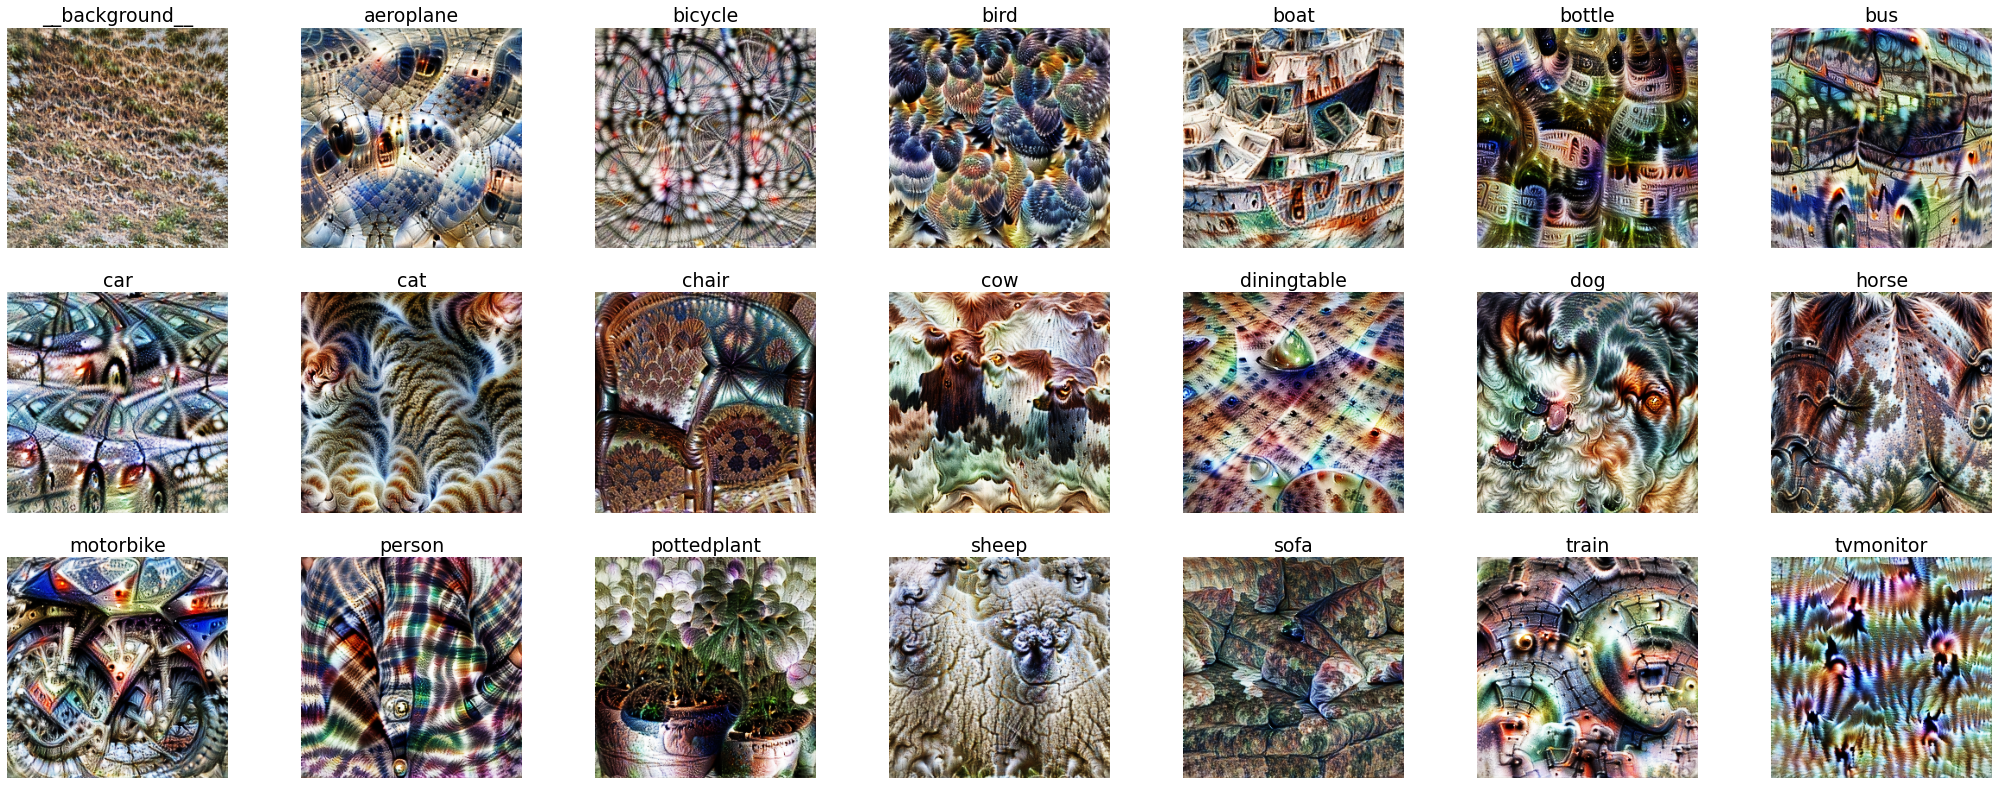

In [33]:
fig, ax = plt.subplots(nrows= 3, ncols= len(classes)//3, figsize=(18*2, 6*2.3))
# fig, ax = plt.subplots(nrows= 1, ncols= 10, figsize=(18, 6))

for i in range(len(all_outs)):
    ax.flat[i].imshow(all_outs[i])
    ax.flat[i].set_title(classes[i], fontsize = 19)
    ax.flat[i].axis("off")

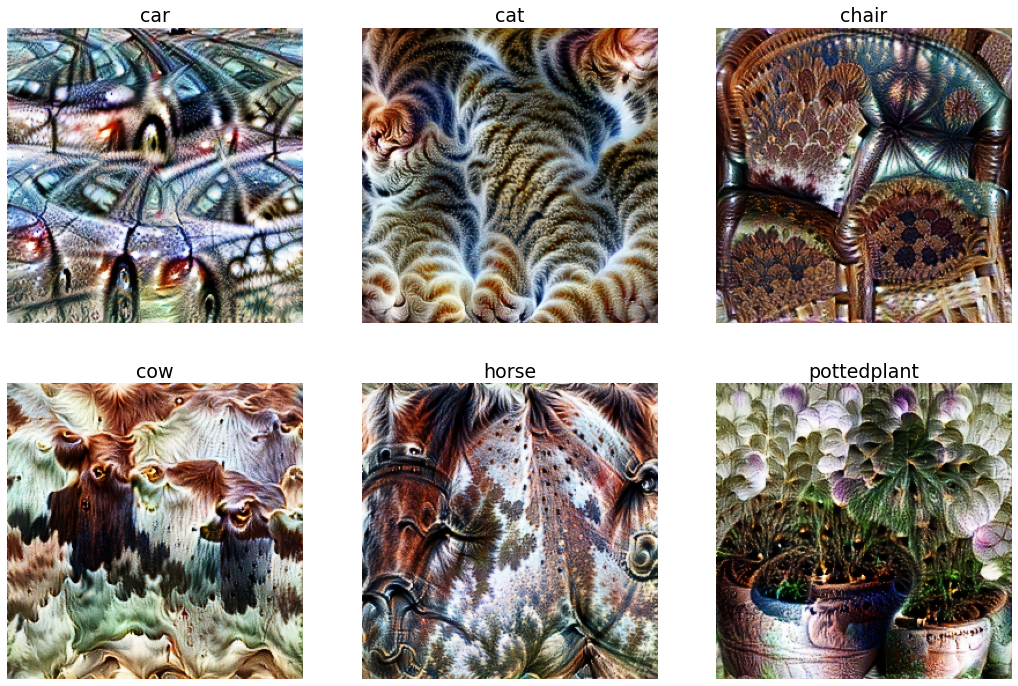

In [40]:
cherry_picked_indices = [7, 8, 9, 10, 13, 16]
fig, ax = plt.subplots(nrows= 2, ncols= len(cherry_picked_indices)//2, figsize=(18, 12))

c = 0
for i in cherry_picked_indices:
    ax.flat[c].imshow(all_outs[i])
    ax.flat[c].set_title(classes[i], fontsize = 19)
    ax.flat[c].axis("off")
    c += 1

In [20]:
!mkdir images

In [22]:
for i in range(len(classes)):
    filename = 'images/' + classes[i]+ '.jpg'
    img = cv2.cvtColor((all_outs[i]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
    cv2.imwrite(filename, img)